In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

#set up grey background typical of seaborn
sns.set(style="ticks", context="talk")

# Load the CSV file
df = pd.read_csv('Exclusive_Economic_Zones_Ranking2.csv', delimiter=',')
# remove \xa0 from Country 
df['Country'] = df['Country'].str.replace('\xa0', '')
# Some values have commas in numbers, we need to remove these and convert columns to numeric
df['EEZ'] = df['EEZ'].replace(',', '', regex=True).astype(int)
df['Land'] = df['Land'].replace(',', '', regex=True).astype(int)

LMIN=0.4*10**2
LMAX=10**7
EMIN=0.9*10**5
EMAX=.8*10**7

# calculate a column 'EEZ/Land' which is the ratio of EEZ to Land
df['EEZ/Land'] = df['EEZ'] / df['Land']
# calculate a column with log10 of EEZ/Land
df['logEEZ/Land'] = df['EEZ/Land'].apply(lambda x: round(10 * (x**0.1)))
# print the total number of rows in the data
print(f'Total number of rows: {len(df)}')
# print the raw containing the text Maldives in country column
print(df[df['Country'] == 'Maldives'])
# create a column 'Country2' which is the country name with the EEZ/Land ratio in brackets with no decimals
df['Country2'] = df['Country'] + ' (' + df['EEZ/Land'].apply(lambda x: '{:.0f}'.format(x)) + ')'

# filter data to match the range of the plot
df = df[(df['Land'] > LMIN) & (df['EEZ'] > EMIN) ]
print(f'{len(df)} countries in the plot range')


Total number of rows: 154
     Country     EEZ   Land   EEZ/Land  logEEZ/Land
31  Maldives  923322  34538  26.733511           14
105 countries in the plot range


In [2]:
sids_list = [
    'Kiribati', 'Federated States of Micronesia', 'Papua New Guinea', 'Marshall Islands',
    'Cook Islands', 'Solomon Islands', 'Seychelles', 'Mauritius', 'Fiji', 'Maldives',
    'Cape Verde', 'Tuvalu', 'Vanuatu', 'Tonga', 'Bahamas', 'Palau', 'Niue', 'Nauru',
    'São Tomé and Príncipe', 'Samoa', 'Suriname', 'Haiti', 'Guinea-Bissau',
    'Antigua and Barbuda', 'Comoros', 'Dominican Republic', 'Jamaica', 'Barbados'
]
other_countries_list = [
    'United States', 'France', 'Australia', 'Russia', 'United Kingdom', 'Indonesia',
    'Canada', 'Japan', 'New Zealand', 'Brazil', 'Chile', 'Mexico', 'Denmark', 'Norway',
    'India', 'Portugal', 'Philippines', 'South Africa', 'Madagascar', 'Argentina',
    'Ecuador', 'Spain', 'Peru', 'China', 'Somalia', 'Colombia', 'Iceland', 'Mozambique',
    'Morocco', 'Costa Rica', 'Namibia', 'Yemen', 'Italy', 'Oman', 'Myanmar', 'Sri Lanka',
    'Angola', 'Greece', 'South Korea', 'Venezuela', 'Vietnam', 'Ireland', 'Libya', 'Cuba',
    'Panama', 'Malaysia', 'Equatorial Guinea', 'Thailand', 'Pakistan', 'Egypt', 'Turkey',
    'Liberia', 'Honduras', 'Tanzania', 'Ghana', 'Saudi Arabia', 'Nigeria', 'Sierra Leone',
    'Gabon', "Côte d'Ivoire", 'Iran', 'Mauritania', 'Sweden', 'Senegal', 'Netherlands',
    'Ukraine', 'Uruguay', 'Guyana', 'Algeria', 'Nicaragua', 'Bangladesh', 'Kenya',
    'Guatemala', 'North Korea', 'Tunisia', 'Cyprus', 'El Salvador'
]



# if country is in sids_list, set 'Type' to 'SIDS'
df.loc[df['Country'].isin(sids_list), 'Type'] = 'SIDS'
# if country is in other_countries_list, set 'Type' to 'Other'
df.loc[df['Country'].isin(other_countries_list), 'Type'] = 'Other'

# print if there are any rows with NaN values in Type column
print(df['Type'].isnull().sum())

0


C:\Users\apa\AppData\Local\Temp\ipykernel_28204\3790646975.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SIDS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Country'].isin(sids_list), 'Type'] = 'SIDS'


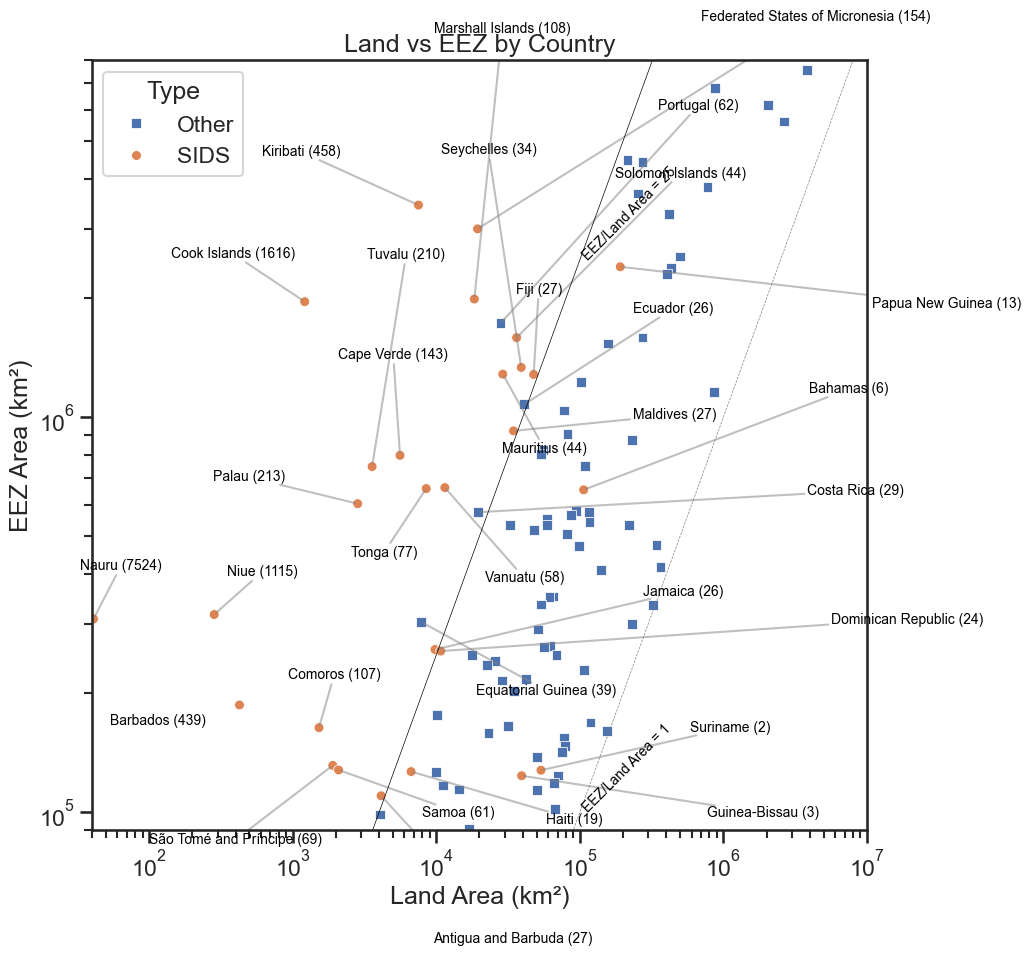

In [3]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Import adjustText for text repelling
import numpy as np

# Plotting using seaborn
plt.figure(figsize=(10, 10))

# Set up the marker style for each type
markers = {
    'SIDS': 'o',    # Circle marker
    'Other': 's'    # Square marker
}

scatter_plot = sns.scatterplot(data=df, x='Land', y='EEZ', s=50, style='Type', hue='Type', markers=markers, legend=True)
# Log-log scale
scatter_plot.set(xscale="log", yscale="log")

x1,y1,x2,y2 = [1, 10**8, 1, 10**8]
angle_slope=np.degrees(np.arctan(1))
plt.plot([x1,y1],[x2,y2], color='grey', linestyle='--', linewidth=0.5)
plt.text(10**5, 10**5, 'EEZ/Land Area = 1', fontsize=10, color='black',  rotation=angle_slope)


FACT = 25
angle_slope_25_log = np.degrees(np.arctan(np.log10(FACT)))
plt.plot([x1,y1], [x2*FACT, y2*FACT], color='black', linewidth=0.5)
plt.text(10**5, 10**5*FACT, 'EEZ/Land Area = 25', fontsize=10, color='black', rotation=angle_slope)

# Create a list to store the text annotations
TEXTS = []

# Adding country labels and storing the text objects in TEXTS
for _, row in df.iterrows():
    if row['EEZ/Land'] > FACT or row['Type'] == 'SIDS':
        x = row['Land']
        y = row['EEZ']
        country = row['Country2']
        
        # Annotate and add text object to TEXTS list
        text = scatter_plot.text(
            x, y, country,
            fontsize=10, color='black',
        )
        


        TEXTS.append(text)
ax=plt.gca()
# Adjust text positions and add arrows
#adjust_text(
#    TEXTS,
#    expand_points=(1.2, 1.2),  # Expand bounding box for better adjustment
#    arrowprops=dict(
#        arrowstyle="->",  # Arrowhead style
#        color='blue',     # Arrow color
#        lw=1              # Arrow line width
#    ),
#    #autoalign='x',       # Automatically align text horizontally
#    ax=ax  # Use current axis
#)

adjust_text(TEXTS, ax=ax,
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5));


# Set x range and y range
plt.xlim(LMIN, LMAX)
plt.ylim(EMIN, EMAX)

# Add title and labels
plt.title('Land vs EEZ by Country')
plt.xlabel('Land Area (km²)')
plt.ylabel('EEZ Area (km²)')

# Place legend in the upper left
plt.legend(loc='upper left', title='Type')

# Save the figure
plt.savefig('Figure3.svg', format='svg')

# Show the plot
plt.show()


In [5]:
# print countries with the  EEZ/Land ratio > 25
print(df[df['EEZ/Land'] > 25][['Country', 'EEZ/Land']])

                            Country     EEZ/Land
11                         Kiribati   457.504985
13   Federated States of Micronesia   154.430707
18                 Marshall Islands   108.116343
19                     Cook Islands  1615.850783
20                         Portugal    61.693143
22                  Solomon Islands    43.808969
24                       Seychelles    34.215472
25                        Mauritius    44.217233
26                             Fiji    26.893994
29                          Ecuador    26.252157
31                         Maldives    26.733511
36                       Cape Verde   143.187444
38                           Tuvalu   209.731469
39                          Vanuatu    57.759383
40                            Tonga    77.440178
42                            Palau   212.893197
45                       Costa Rica    29.345162
62                             Niue  1114.732394
63                            Nauru  7523.902439
64                Eq